In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)

y_proba = np.array([1] * n)
y_pred = y_proba > .5

print(f"accuracy score: {accuracy_score(y, y_pred)}")

cf_mat = confusion_matrix(y, y_pred)

print("Confusion matrix")
print(cf_mat)

print(f" class 0 accuracy: {cf_mat[0][0]/n_0}")
print(f" class 1 accuracy: {cf_mat[1][1]/n_1}")



accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
 class 0 accuracy: 0.0
 class 1 accuracy: 1.0


In [6]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)

y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() + 
    np.random.uniform(.3, 1,  n_1).tolist()
)

y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')

cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)

print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7148
Confusion matrix
[[ 382  118]
 [2734 6766]]
class 0 accuracy: 0.764
class 1 accuracy: 0.7122105263157895


model 1 AUC score: 0.5


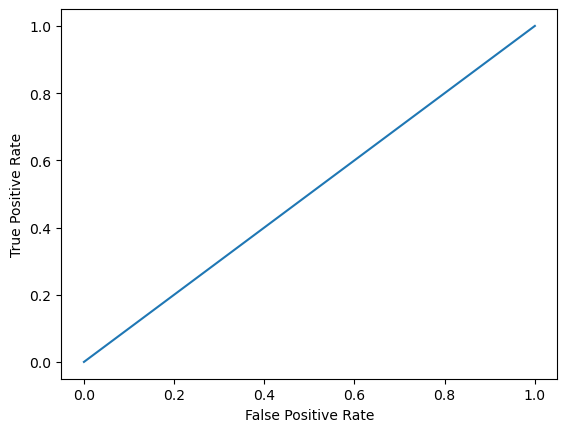

In [8]:
# In cases like this, using another evaluation metric like AUC would be preferred.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95

n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)

# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba = np.array([1]*n)
y_pred = y_proba > .5

def plot_roc_curve(true_y, y_prob):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y, y_proba)
print(f"model 1 AUC score: {roc_auc_score(y, y_proba)}")







model 2 AUC score: 0.8299492631578947


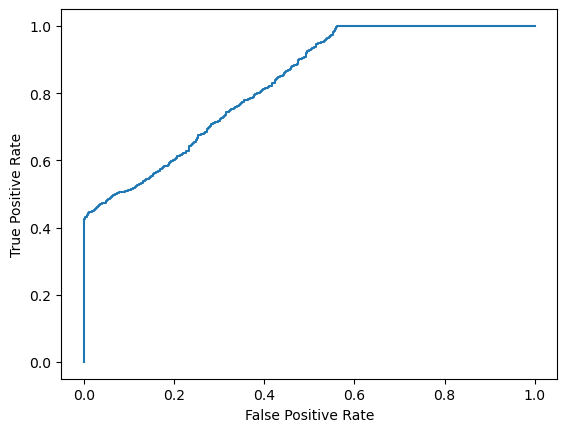

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)

y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() + 
    np.random.uniform(.3, 1,  n_1).tolist()
)

y_pred_2 = y_proba_2 > .5

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

In [12]:
# Probabilities

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000

y = np.array([0] * n + [1] * n)

y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist()+
    np.random.uniform(.3, .7, n).tolist()+
    np.random.uniform(.5, .75, n//2).tolist()
)

y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() + 
    np.random.uniform(.3, .7, n).tolist() + 
    np.random.uniform(0.6, 1, n//2).tolist()
)


print(f"model 1 accuracy score: {accuracy_score(y, y_prob_1 > .5)}")
print(f"model 2 accuracy score: {accuracy_score(y, y_prob_2 > .5)}")

print(f"model 1 AUC score: {roc_auc_score(y, y_prob_1)}")
print(f"model 2 AUC score: {roc_auc_score(y, y_prob_2)}")

model 1 accuracy score: 0.74835
model 2 accuracy score: 0.7489
model 1 AUC score: 0.7745179200000001
model 2 AUC score: 0.8600721900000001


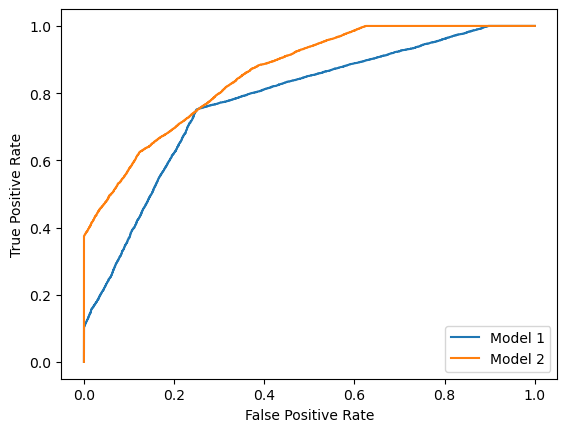

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n = 10000

y = np.array([0] * n + [1] * n)

y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist()+
    np.random.uniform(.3, .7, n).tolist()+
    np.random.uniform(.5, .75, n//2).tolist()
)

y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() + 
    np.random.uniform(.3, .7, n).tolist() + 
    np.random.uniform(0.6, 1, n//2).tolist()
)

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, label='Model 1')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(y, y_prob_1)


fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr, label = 'Model 2')

plt.legend(loc='lower right')
plt.show()
